In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# 2. Tải file dữ liệu
df = pd.read_csv('./data/BTC-USD.csv')
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-01,6318.140137,6547.140137,6311.830078,6377.779785,6377.779785,3789400000
1,2018-11-02,6378.919922,6396.859863,6327.379883,6388.439941,6388.439941,4234870000
2,2018-11-03,6387.240234,6400.069824,6342.370117,6361.259766,6361.259766,3658640000
3,2018-11-04,6365.470215,6388.629883,6294.569824,6376.129883,6376.129883,4390020000
4,2018-11-05,6363.620117,6480.589844,6363.620117,6419.660156,6419.660156,4174800000
...,...,...,...,...,...,...,...
1822,2023-10-28,33907.722656,34399.390625,33874.804688,34089.574219,34089.574219,10160330825
1823,2023-10-29,34089.371094,34743.261719,33947.566406,34538.480469,34538.480469,11160323986
1824,2023-10-30,34531.742188,34843.933594,34110.972656,34502.363281,34502.363281,17184860315
1825,2023-10-31,34500.078125,34719.253906,34083.308594,34667.781250,34667.781250,15758270810


In [3]:
# Chia train test validate theo tỉ lệ 7:1:2
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

# Chia train test validate theo tỉ lệ 6:2:2
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1) #x_train chứa các chỉ số, là biến độc lập
#reshape(-1,1) đảm bảo rằng x_train là một mảng 2D
#np.array(...) chuyển đổi...sang mảng numpy
y_train = np.array(train_data['Close']) #y_train chứa gtr Close, là biến phụ thuộc

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val = model.predict(x_val)

In [6]:
# 6. Quá trình tạo index predict 100 ngày tiếp theo
last_index =  df.index[-1] #lấy chỉ số dòng cuối cùng trong dataframe
last_data = pd.RangeIndex(start=last_index, stop=last_index+100, step=1)

# Tạo một mảng numpy chứa 100 số nguyên liên tiếp bắt đầu từ last_index + 1
x_next_100_days = np.array(range(last_index+1, last_index+101)).reshape(-1, 1)

# Dự đoán giá đóng cửa cho next 100 days
y_next_100_days = model.predict(x_next_100_days)

# In ra giá đóng cửa dự đoán cho 30 ngày tiếp theo
print('Predicted closing prices for the next 100 days:')
print(y_next_100_days)

Predicted closing prices for the next 100 days:
[78044.82305479 78090.83442806 78136.84580134 78182.85717462
 78228.8685479  78274.87992117 78320.89129445 78366.90266773
 78412.914041   78458.92541428 78504.93678756 78550.94816084
 78596.95953411 78642.97090739 78688.98228067 78734.99365394
 78781.00502722 78827.0164005  78873.02777378 78919.03914705
 78965.05052033 79011.06189361 79057.07326688 79103.08464016
 79149.09601344 79195.10738672 79241.11875999 79287.13013327
 79333.14150655 79379.15287982 79425.1642531  79471.17562638
 79517.18699966 79563.19837293 79609.20974621 79655.22111949
 79701.23249276 79747.24386604 79793.25523932 79839.2666126
 79885.27798587 79931.28935915 79977.30073243 80023.3121057
 80069.32347898 80115.33485226 80161.34622554 80207.35759881
 80253.36897209 80299.38034537 80345.39171864 80391.40309192
 80437.4144652  80483.42583848 80529.43721175 80575.44858503
 80621.45995831 80667.47133158 80713.48270486 80759.49407814
 80805.50545142 80851.51682469 80897.52

In [7]:
# 7. Tính RMSE: Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2)) #mean: tính giá trị trung bình
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# Tính MAE cho validate và test
valid_mae = np.mean(np.abs(y_pred_val - y_val)) #abs: giá trị tuyệt đối
test_mae = np.mean(np.abs(y_pred - y_test))

# Tính MAPE cho validate và test
valid_mape = np.mean(np.abs((y_pred_val - y_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

# In kết quả
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 44551.68326653272
Testing RMSE: 25430.934203040375
Validation MAE: 44449.38763369232
Testing MAE: 21347.19246729042
Validation MAPE: 185.17123928286583
Testing MAPE: 87.7748143140973


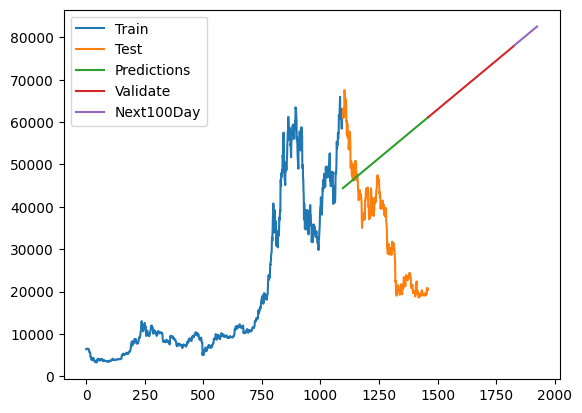

In [8]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_100_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next100Day'])
plt.show()